In [240]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [241]:
datos = pd.read_csv('./altura_peso.csv')
datos.head(10)

,Altura,Peso
0,1.82,88
1,1.75,78
2,1.80,76
3,1.70,68
4,1.68,65
5,1.75,72
6,1.85,80
7,1.70,65
8,1.82,90
9,1.67,60


In [242]:
# Prepararamos los datos para el primer modelo (solo altura).
X = datos[['Altura']].values
y = datos['Peso'].values

# Dividimos los datos en 75% entrenamiento y 25% prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Creamos el modelo de regresión lineal.
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X)

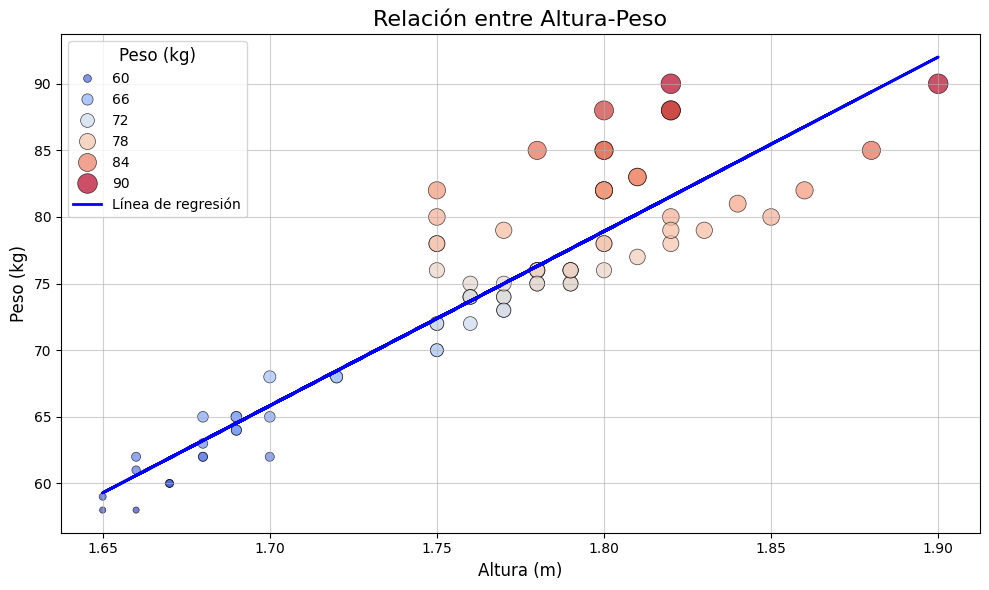

In [243]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión.
scatter = sb.scatterplot(x="Altura", y="Peso", data=datos,
                         hue="Peso", palette="coolwarm",
                         size="Peso", sizes=(20, 200), edgecolor="k", alpha=0.7)

# Agregamos la línea de regresión.
plt.plot(X, y_pred, color='blue', linewidth=2, linestyle='-', label='Línea de regresión')

# Títulos y etiquetas.
plt.title('Relación entre Altura-Peso', fontsize=16)
plt.xlabel('Altura (m)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)

# Añadidimos una leyenda.
legend = plt.legend(title='Peso (kg)', loc='upper left')
plt.setp(legend.get_title(), fontsize=12)

# Ajustamos la visualización.
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()

plt.show()

In [244]:
ErnestinaCantarero = 1.54
prediccionPeso = modelo.predict([[ErnestinaCantarero]])
print(f"La altura de Ernestina Cantarero es {ErnestinaCantarero} m, el peso aprox. de ella es {prediccionPeso} kg.")

La altura de Ernestina Cantarero es 1.54 m, el peso aprox. de ella es [44.89490376] kg.


In [245]:
modelo.score(X_train, y_train) # Puntaje del modelo.

0.858855886297083

In [246]:
print(f"Peso: {modelo.coef_}")
print(f"Sesgo: {modelo.intercept_}")

Peso: [130.87443156]
Sesgo: -156.65172083969588


**El modelo funciona como se esperaba, el puntaje supera el 80%. En el caso real Ernestina Cantarero pesa 48.0808 kg y la predicción estuvo muy cerca con 44.89490376 kg.**